In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path=r"E:\DL_class\deep_L\CNN\dogscats"

In [4]:
train_dir=os.path.join(path,'train')
validation_dir=os.path.join(path,'valid')

In [5]:
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
val_cats_dir=os.path.join(validation_dir,'cats')
val_dogs_dir=os.path.join(validation_dir,'dogs')

In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(val_cats_dir))
num_dogs_val = len(os.listdir(val_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [7]:
total_train

23000

In [8]:
total_val

2000

In [9]:
batch_size = 32
epochs = 5
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [10]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [11]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 23000 images belonging to 2 classes.


In [12]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.


In [13]:
sample_training_images, _ = next(train_data_gen)


In [14]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

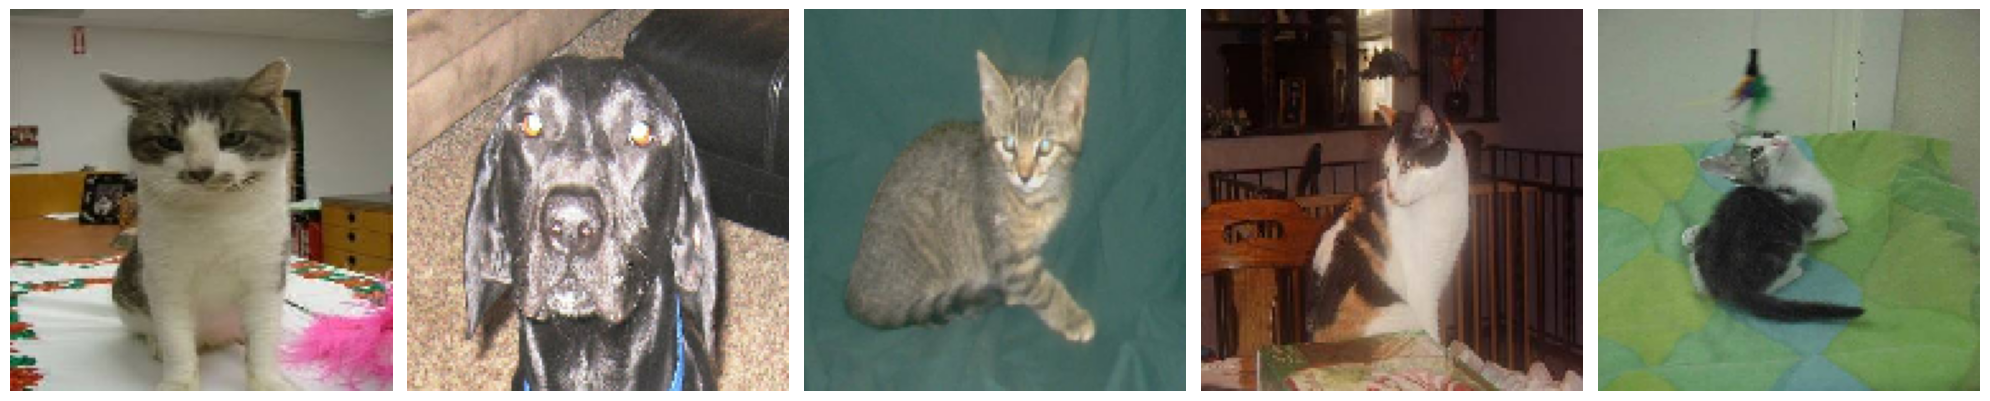

In [15]:
plotImages(sample_training_images[:5])


In [16]:
model=Sequential()
model.add(Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['Accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [ ]:
history=model.fit(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size


)

Epoch 1/5
718/718 [==============================] - 725s 1s/step - loss: 0.5805 - Accuracy: 0.6853 - val_loss: 0.4783 - val_Accuracy: 0.7752
Epoch 2/5
718/718 [==============================] - 784s 1s/step - loss: 0.4407 - Accuracy: 0.7918 - val_loss: 0.4156 - val_Accuracy: 0.8090
Epoch 3/5
428/718 [================>.............] - ETA: 6:15 - loss: 0.3790 - Accuracy: 0.8287

In [28]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [29]:
model.save("catDog.h5")

In [36]:
from keras.models import load_model

import cv2

import numpy as np


img = cv2.imread(r"E:\DL_class\deep_L\CNN\dogscats\samples\cat.jpg")


img = cv2.resize(img,(150,150))

img = np.reshape(img,[1,150,150,3])




In [37]:
yhat=model.predict(img)
i = 0
if(yhat >= 0.5): 
    print("Dog") 
else: 
    print("Cat")

1/1 [==============================] - 0s 72ms/step
Dog


In [39]:
import gradio as gr

C:\Users\dnyan\anaconda3\envs\ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image
# Load trained model
model = tf.keras.models.load_model("catDog.h5")

IMG_SIZE = 150  # must match training size

def predict_image(image):
    # Convert PIL image to array
    image = image.resize((IMG_SIZE, IMG_SIZE))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image)

    if prediction > 0.5:
        return f"🐶 Dog"
    else:
        return f"🐱 Cat"


# Gradio Interface
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil", label="Upload Dog or Cat Image"),
    outputs=gr.Textbox(label="Prediction"),
    title="🐶🐱 Dog vs Cat Classifier",
    description="Upload an image to classify whether it is a Dog or a Cat"
)

interface.launch(share=True)



C:\Users\dnyan\anaconda3\envs\ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://205647cdce919419b5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
